In [1]:
import pandas as pd

In [2]:
scored_de_xlmr = pd.read_csv(
    "./opensubtitles/de-en.tok/de_subspace_qa_output/xlmr_nliv2_5-langs_OpenSubtitles.de-en.de.tok.csv")
scored_de_xlmr.rename(columns={"Action": "de", "Score": "de_xlmr_score"}, inplace=True)

scored_de_gbert = pd.read_csv(
    "./opensubtitles/de-en.tok/de_subspace_qa_output/gbert-base_nliv2_de_OpenSubtitles.de-en.de.tok.csv")["Score"]
scored_de_gbert.rename("de_gbert_score", inplace=True)


scored_en_xlmr = pd.read_csv(
    "./opensubtitles/de-en.tok/en_subspace_qa_output/xlmr_nliv2_5-langs_OpenSubtitles.de-en.en.tok.csv")
scored_en_xlmr.rename(columns={"Action": "en", "Score": "en_xlmr_score"}, inplace=True)

scored_en_bert = pd.read_csv(
    "./opensubtitles/de-en.tok/en_subspace_qa_output/bert-base-cased_nliv2_en_OpenSubtitles.de-en.en.tok.csv")["Score"]
scored_en_bert.rename("en_bert_score", inplace=True)

0          -0.167128
1          -0.394810
2           0.150108
3          -0.329838
4           0.097872
              ...   
22480024    0.091661
22480025   -0.181931
22480026    0.230305
22480027   -0.405924
22480028   -0.189259
Name: en_bert_score, Length: 22480029, dtype: float64

In [3]:
dual_xent_scores = pd.read_csv("./opensubtitles/de-en.tok/dxent.scores")

In [4]:
assert len(scored_de_xlmr) == len(scored_en_xlmr) == len(scored_de_gbert)  == len(scored_en_bert) == len(dual_xent_scores)

In [5]:
data = pd.concat([scored_de_xlmr, scored_en_xlmr, scored_en_bert, scored_de_gbert, dual_xent_scores], axis=1)

In [6]:
data.head()

,de,de_xlmr_score,en,en_xlmr_score,en_bert_score,de_gbert_score,DualXent
0,- Gloucester ? ! - Die sollten doch in Serfam ...,-0.339045,They should have surrendered when they had the...,-0.168553,-0.167128,-0.014514,2.476880e-06
1,Das sind nur Ubergroﬁe Knightmares !,-0.222421,What ?,0.237191,-0.394810,-0.113709,2.070940e-08
2,Es wére besser ihr kapituliert schleunigst !,-0.136661,Cornelia ...,0.259100,0.150108,-0.523387,1.040727e-06
3,Cornelia hat mit nur einer Maschine ... ? !,-0.237058,So this means that the creatures of Area 18 ha...,-0.456865,-0.329838,-0.122885,4.959832e-06
4,Damit ist die Einnahme von Area 18 abgeschloss...,0.182364,"Sorry , I 'll have you accompany me in finishi...",0.188728,0.097872,-0.229209,1.261159e-05


In [7]:
import math
data["xlmr_diff"] = abs(data.en_xlmr_score - data.de_xlmr_score)
data["de_diff"] = abs(data.de_gbert_score - data.de_xlmr_score)
data["en_diff"] = abs(data.en_bert_score - data.en_xlmr_score)
data["bert_diff"] = abs(data.en_bert_score - data.de_gbert_score)
data["log_dual_xent"] = data.DualXent.map(math.log)

In [8]:
data = data.drop_duplicates(['de','en'], keep='last')
data = data[data.en.map(lambda x: isinstance(x, str))]
data = data[data.de.map(lambda x: isinstance(x, str))]

In [9]:
data = data[data.en.map(lambda x: "?" not in x)]
data = data[data.de.map(lambda x: "?" not in x)]

In [10]:
print("XLMR diff")
print(f"Correlation with exp scores: {data.xlmr_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.xlmr_diff.corr(data.log_dual_xent)}")

print("German diff")
print(f"Correlation with exp scores: {data.de_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.de_diff.corr(data.log_dual_xent)}")

print("English diff")
print(f"Correlation with exp scores: {data.de_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.de_diff.corr(data.log_dual_xent)}")

print("English vs German mono")
print(f"Correlation with exp scores: {data.bert_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.bert_diff.corr(data.log_dual_xent)}")

XLMR diff
Correlation with exp scores: -0.1614573748736082
Correlation with lgo scores: -0.2785419087272544
German diff
Correlation with exp scores: -0.02103227070544358
Correlation with lgo scores: -0.03233114575302418
English diff
Correlation with exp scores: -0.02103227070544358
Correlation with lgo scores: -0.03233114575302418
English vs German mono
Correlation with exp scores: -0.07683497745668504
Correlation with lgo scores: -0.1627359195209456


In [11]:
import matplotlib.pyplot as plt

(array([9.292562e+06, 4.055825e+06, 1.011343e+06, 2.241450e+05,
        5.363900e+04, 1.274600e+04, 2.766000e+03, 5.590000e+02,
        7.900000e+01, 1.500000e+01]),
 array([5.11454504e-10, 1.99788154e-01, 3.99576308e-01, 5.99364462e-01,
        7.99152616e-01, 9.98940770e-01, 1.19872892e+00, 1.39851708e+00,
        1.59830523e+00, 1.79809339e+00, 1.99788154e+00]),
 <BarContainer object of 10 artists>)

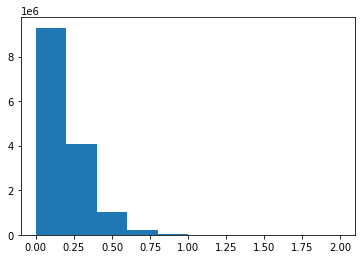

In [13]:
plt.hist(data.bert_diff)

(array([6.000000e+00, 9.000000e+01, 5.610000e+02, 2.739000e+03,
        1.776400e+04, 1.163400e+05, 6.536060e+05, 2.538148e+06,
        5.936513e+06, 5.387912e+06]),
 array([-40.32320748, -36.30436077, -32.28551406, -28.26666735,
        -24.24782064, -20.22897392, -16.21012721, -12.1912805 ,
         -8.17243379,  -4.15358708,  -0.13474037]),
 <BarContainer object of 10 artists>)

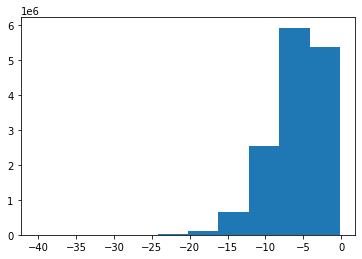

In [14]:
plt.hist(data.log_dual_xent)

(-20.0, 0.0)

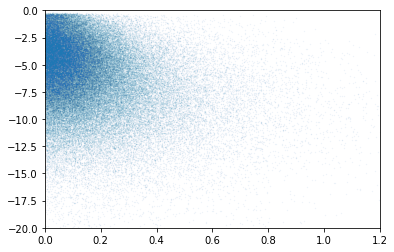

In [16]:
plt.scatter(data.xlmr_diff[:100000], data.log_dual_xent[:100000], alpha=0.1, s=0.1)
plt.xlim((0, 1.2))
plt.ylim((-20, 0))

In [17]:
len(data)

14653679

In [18]:
data = data[data.log_dual_xent > -3]
print("XLMR diff")
print(f"Correlation with exp scores: {data.xlmr_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.xlmr_diff.corr(data.log_dual_xent)}")

print("German diff")
print(f"Correlation with exp scores: {data.de_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.de_diff.corr(data.log_dual_xent)}")

print("English diff")
print(f"Correlation with exp scores: {data.de_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.de_diff.corr(data.log_dual_xent)}")

print("English vs German mono")
print(f"Correlation with exp scores: {data.bert_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.bert_diff.corr(data.log_dual_xent)}")

XLMR diff
Correlation with exp scores: -0.10907215411917356
Correlation with lgo scores: -0.10381002266063197
German diff
Correlation with exp scores: -0.011696182371749927
Correlation with lgo scores: -0.0090340840747418
English diff
Correlation with exp scores: -0.011696182371749927
Correlation with lgo scores: -0.0090340840747418
English vs German mono
Correlation with exp scores: -0.023205121620504542
Correlation with lgo scores: -0.023692660398922063


In [46]:
data.nlargest(200, 'en_diff').tail(50)[['en', 'en_bert_score', 'en_xlmr_score']]

,en,en_bert_score,en_xlmr_score
4785630,"It is awful good of you to see us , Reese .",0.648980,-0.310538
8903921,Rationally ...!,-0.516688,0.442226
16147431,You befriended her and used her .,-0.322176,0.636018
145626,He was a swell dog .,0.387871,-0.570213
17961520,Rust .,-0.536359,0.420846
13738321,Rust .,-0.536359,0.420846
3873624,The slut deserved it .,-0.458619,0.498531
16453491,You look fried .,-0.356451,0.599423
11363365,Eat him .,-0.627735,0.327551
8970315,It 's a dwarf galaxy in the local group .,0.317310,-0.637819


In [51]:
data[['xlmr_diff', 'de_diff', 'en_diff', 'bert_diff']].mean()

xlmr_diff    0.116883
de_diff      0.147191
en_diff      0.162826
bert_diff    0.159146
dtype: float64

(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00, 5.00000e+00,
        8.00000e+00, 1.30000e+01, 1.80000e+01, 1.00000e+01, 3.20000e+01,
        4.10000e+01, 7.90000e+01, 1.01000e+02, 1.11000e+02, 1.71000e+02,
        2.08000e+02, 2.37000e+02, 3.01000e+02, 3.71000e+02, 5.10000e+02,
        6.10000e+02, 7.74000e+02, 8.36000e+02, 1.00200e+03, 1.21300e+03,
        1.48000e+03, 1.88600e+03, 2.31800e+03, 2.89000e+03, 3.72400e+03,
        4.74600e+03, 6.02900e+03, 8.03500e+03, 1.03510e+04, 1.34310e+04,
        1.83800e+04, 2.51880e+04, 3.48730e+04, 4.86850e+04, 6.76050e+04,
        9.44260e+04, 1.31006e+05, 1.78094e+05, 2.30094e+05, 2.78309e+05,
        3.09720e+05, 3.19863e+05, 3.01387e+05, 2.69351e+05, 2.27709e+05,
        1.87490e+05, 1.49207e+05, 1.15886e+05, 8.71970e+04, 6.45310e+04,
        4.75750e+04, 3.45710e+04, 2.57390e+04, 1.90290e+04, 1.45350e+04,
        1.09340e+04, 8.32200e+03, 6.54300e+03, 5.04

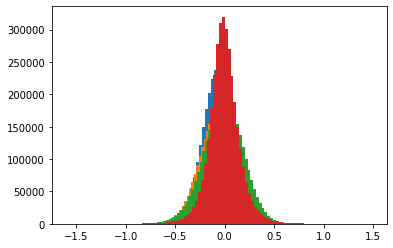

In [64]:
plt.hist(data.de_gbert_score - data.de_xlmr_score, bins=100t)
plt.hist(data.en_bert_score - data.en_xlmr_score, bins=100)
plt.hist(data.en_bert_score - data.de_gbert_score, bins=100)
plt.hist(data.en_xlmr_score - data.de_xlmr_score, bins=100)

In [39]:
data.to_csv("scored-en-de.csv")

In [76]:
import scipy.stats
#scipy.stats.ttest_rel(data.de_gbert_score, data.de_xlmr_score)
scipy.stats.ttest_rel(data.en_bert_score[1:], data.de_gbert_score[:-1]).pvalue

0.0